# PC-lab: Unsupervised Learning

_Unsupervised learning_ is a different branch of machine learning, as in this case a response variable $y$ is missing. Therefore, unsupervised learning techniques are most often used for exploratory purposes or as a preprocessing step in a supervised context. Unsupervised learning is more prone to subjectivity because results are harder (or even impossible) to validate. This is why one should be careful with the interpretation of results after unsupervised learning. (Those interested can have a look at the paper ["Clustering: Science or Art"](http://proceedings.mlr.press/v27/luxburg12a/luxburg12a.pdf), which summarizes a couple of critics and tries to give some pointers considering the evaluation of clustering algorithms). 

In this PC-lab we will have a look at two frequently applied techniques in the context of unsupervised learning, namely principal component analysis and k-means clustering. We will end with a general scheme, in which both techniques are used. Datasets that will be used in this PC-lab are the `iris`-dataset and `digits`-dataset. 

![unsupervised](https://analystprep.com/study-notes/wp-content/uploads/2021/03/Img_12.jpg)

## Dimensionality Reduction: Principal Components Analysis

![gaussianscatterpca](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/800px-GaussianScatterPCA.svg.png)

A popular area of unsupervised learning is the area of _Dimensionality Reduction_, in which one tries to reduce the number of variables for visualization purposes or as a preprocessing step for clustering or classification/regression techniques. An established technique which you will find back in most statistics courses is _Principal Components Analysis_ (PCA).

Assume a _normalized_ $n\times p$ data matrix $\mathbf{X}$. 
    
#### **Goal:** find the direction in $\mathbf{X}$ with the largest variance (i.e., the most information). 

In other words, we need to find a linear combination of the inputs:

$$ z_{i1} = \phi_{11}x_{i1}+\phi_{21}x_{i2}+\ldots+\phi_{p1}x_{ip},$$

, where $\mathbf{\phi}$ is also called the loadings in PCA nomenclature, for which the variance is maximized:

$$\text{maximize}_{\phi_{11},\ldots,\phi_{p1}}\Big\{\frac{1}{n}\sum_{i=1}^{n}\Big(\sum_{j=1}^{p}\phi_{j1}x_{ij}\Big)^{2}\Big\}\quad \text{subject to} \quad \sum_{j=1}^{p}\phi_{j1}^{2}=1.$$


<div class="alert alert-success">
<b>EXERCISE 1 (warm-up): 
<br>
a) Have a look at the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a> dataset. Reduce the dataset using PCA and visualize its first two components using a scatterplot. Don't forget to preprocess your data. Do you see distinctive groups? 
<br> 
b) How much variance is captured in the first three components? 
</b>
</div>

In [2]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.utils import resample

import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display, HTML
from IPython.display import Image

plt.style.use('seaborn-white')
%matplotlib inline

/tmp/ipykernel_288120/4288135788.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [3]:
#Preprocessing:
iris = load_iris()
X_train = iris.data
labels = iris.target

In [4]:
##1a): 
pca = PCA()
pca.fit(X_train)
X_transformed = pca.transform(X_train)

Text(0, 0.5, 'PC2 (5.0%)')

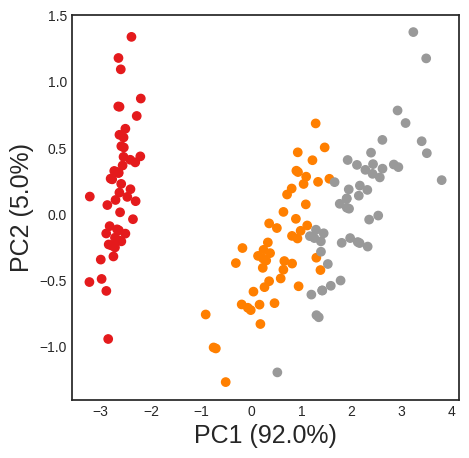

In [5]:
var = pca.explained_variance_ratio_
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(X_transformed[:,0],X_transformed[:,1], c=labels, cmap=plt.cm.Set1);
ax.set_xlabel(r'PC1 (' + str(np.round(var[0],2)*100) + '%)', size=18)
ax.set_ylabel(r'PC2 (' + str(np.round(var[1],2)*100) + '%)', size=18)

In [6]:
# You could have also calculated this manually:
print(X_train[0])
print(X_transformed[0])
print(((X_train[0]-pca.mean_)*pca.components_).sum(axis=1))

[5.1 3.5 1.4 0.2]
[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]


In [7]:
##1b): 
var = pca.explained_variance_ratio_
expl_var_comp012 = var[0] + var[1] + var[2]
print('Explained variance first three components: ' + str(expl_var_comp012))

Explained variance first three components: 0.9947878161267247


In [8]:
var.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [9]:
np.insert(var.cumsum(),0,0)

array([0.        , 0.92461872, 0.97768521, 0.99478782, 1.        ])

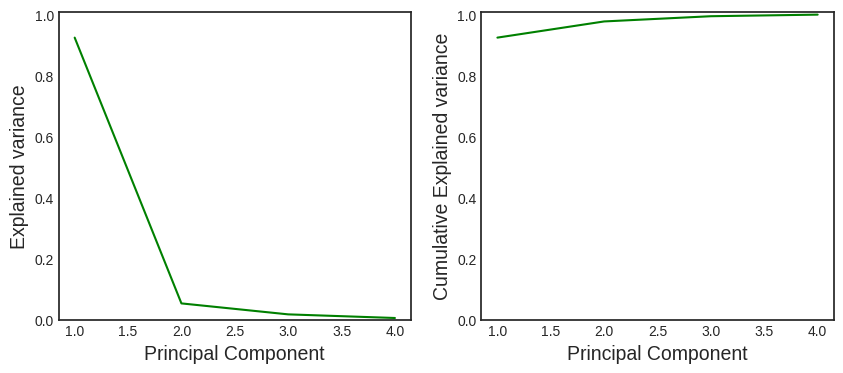

In [10]:
##1b): 
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(np.arange(1,var.shape[0]+1),var,color='g');
ax[0].set_xlabel('Principal Component', size=14)
ax[0].set_ylabel('Explained variance', size=14)
ax[0].set_ylim(0,1.01)

ax[1].plot(np.arange(1,var.shape[0]+1),var.cumsum(),color='g');
ax[1].set_xlabel('Principal Component', size=14)
ax[1].set_ylabel('Cumulative Explained variance', size=14)
ax[1].set_ylim(0,1.01)

plt.show()

## $K$-Means Clustering

K-means clustering aims to partition the data in K clusters, so that the within-cluster variation is minimized:

$$ \text{minimize}_{C_{1},\ldots,C_{K}} \Big\{ \sum_{k=1}^{K}W(C_{k})\Big\},$$

where the most popular choice for $W(C_{k})$ is the Euclidean distance:

$$W(C_{k})=\frac{1}{|C_{k}|}\sum_{i,i'\in C_{k}}\sum_{j=1}^{p}(x_{ij}-x_{i'j})^{2}.$$

K-means clustering uses the following three steps, for which step two and three are repeated until convergence is reached: 

1) The first step chooses the initial centroids; most easy way of doing this is by choosing K samples at random from the dataset. 

2) In the second step each element of the dataset is assigned to its nearest centroid. 

3) New centroids are chosen by taking the mean of all clustered samples according to the previous centroid. 

<div class="alert alert-success">

<b>EXERCISE 2.1</b>: 
**Cluster the Iris dataset by means of 2-means, 3-means clustering, and 4-means clustering. Compare the clustering results by visualizing the data in the space induced by the first two principal components.**
</b>
</div>

/home/natan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


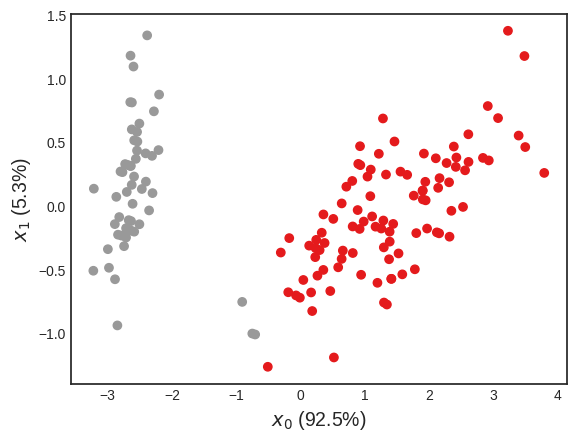

In [11]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

fig, ax = plt.subplots()
ax.scatter(X_transformed[:,0],X_transformed[:,1], c=kmeans.labels_, cmap=plt.cm.Set1);
ax.set_xlabel(r'$x_0$ (' + str(np.round(var[0],3)*100) + '%)', size=14)
ax.set_ylabel(r'$x_1$ (' + str(np.round(var[1],3)*100) + '%)', size=14)
plt.legend()
plt.show()

/home/natan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


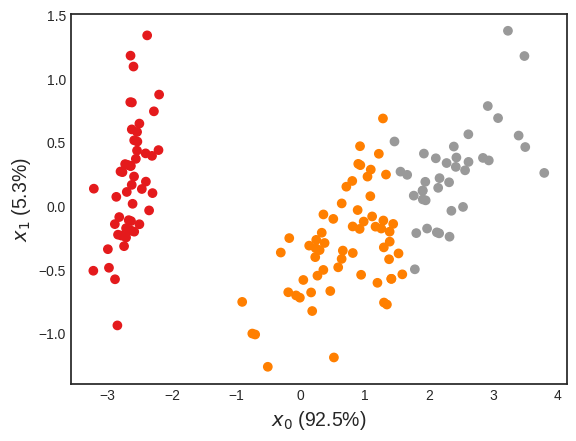

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

fig, ax = plt.subplots()
ax.scatter(X_transformed[:,0],X_transformed[:,1], c=kmeans.labels_, cmap=plt.cm.Set1);
ax.set_xlabel(r'$x_0$ (' + str(np.round(var[0],3)*100) + '%)', size=14)
ax.set_ylabel(r'$x_1$ (' + str(np.round(var[1],3)*100) + '%)', size=14)
plt.legend()
plt.show()

/home/natan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


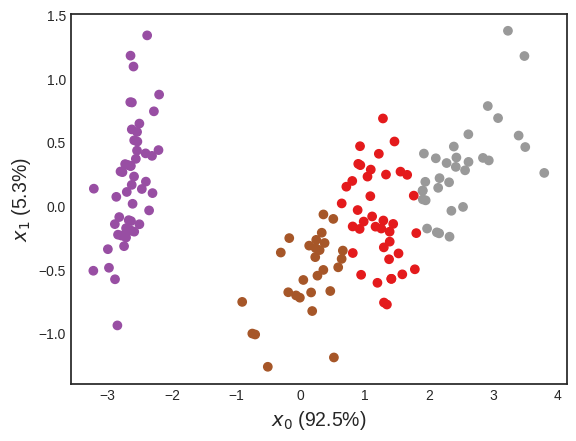

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)

fig, ax = plt.subplots()
ax.scatter(X_transformed[:,0],X_transformed[:,1], c=kmeans.labels_, cmap=plt.cm.Set1);
ax.set_xlabel(r'$x_0$ (' + str(np.round(var[0],3)*100) + '%)', size=14)
ax.set_ylabel(r'$x_1$ (' + str(np.round(var[1],3)*100) + '%)', size=14)
plt.legend()
plt.show()

## Hierarchical Clustering

<div class="alert alert-success">
<b>
EXERCISE 3:
<br>
 Calculate the linkage matrix using the "linkage" function from "scipy.cluster.hierarchy" and visualize it using the "dendrogram" function from the same package. Experiment with the different types of linkage and observe how the dendrogram changes. Based on the dendrogram, decide on the number of clusters and cluster the data using the "AgglomerativeClustering" function from sklearn. Visualize the results as before.
<br>
<br>
Extra:
In practice, when doing exploratory work like this, you probably don’t want to copy-paste or modify the same code repeatedly. Try wrapping this entire procedure in a function to quickly visualize the effect of using a different linkage type and number of clusters. (Plot both the clustering and the dendrogram.)
</b>
</div>


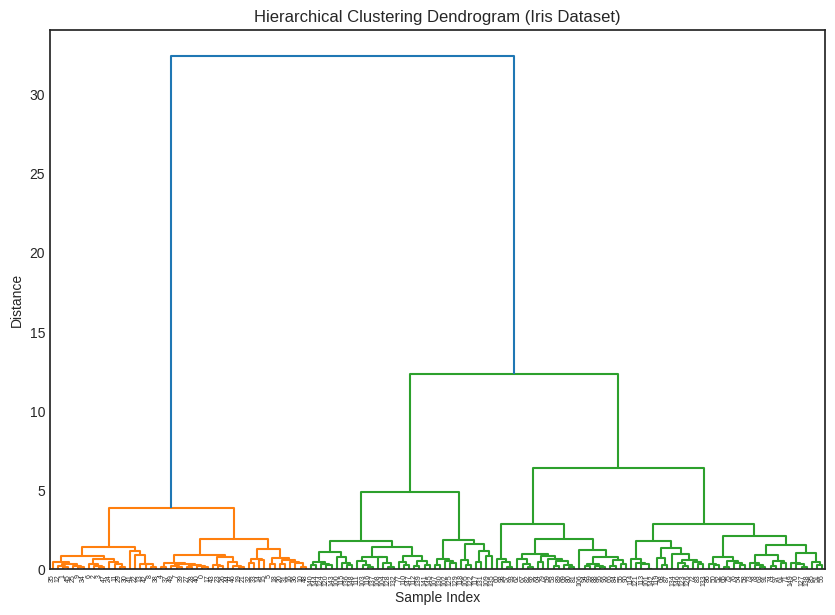

In [14]:
# import functions
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Linkage matrix for dendrogram
linkage_matrix = linkage(X_train, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Iris Dataset)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [15]:
# perform clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage="ward")
x_pred = agg_clustering.fit_predict(X_train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


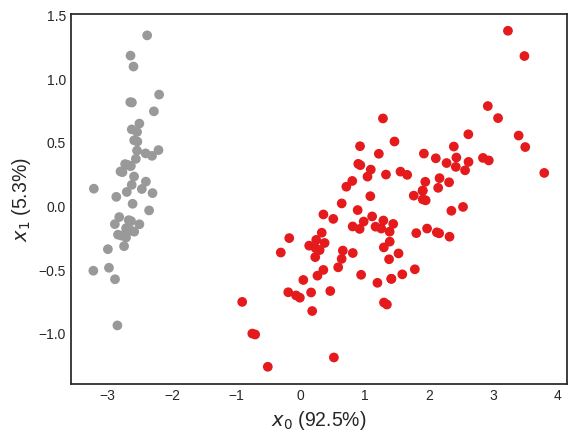

In [16]:
# Visualize results
fig, ax = plt.subplots()
ax.scatter(X_transformed[:,0],X_transformed[:,1], c=x_pred, cmap=plt.cm.Set1);
ax.set_xlabel(r'$x_0$ (' + str(np.round(var[0],3)*100) + '%)', size=14)
ax.set_ylabel(r'$x_1$ (' + str(np.round(var[1],3)*100) + '%)', size=14)
plt.legend()
plt.show()

In [17]:
# extra: function 
def plot_clustering(X_train, n_clusters, linkage_type, X_transformed):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_type)
    x_pred = agg_clustering.fit_predict(X_train)
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0].scatter(X_transformed[:,0],X_transformed[:,1], c=x_pred, cmap=plt.cm.Set1);
    ax[0].set_xlabel(r'$x_0$ (' + str(np.round(var[0],3)*100) + '%)', size=14)
    ax[0].set_ylabel(r'$x_1$ (' + str(np.round(var[1],3)*100) + '%)', size=14)
    
    linkage_matrix = linkage(X_train, method=linkage_type)
    dendrogram(linkage_matrix, ax=ax[1])
    plt.show()



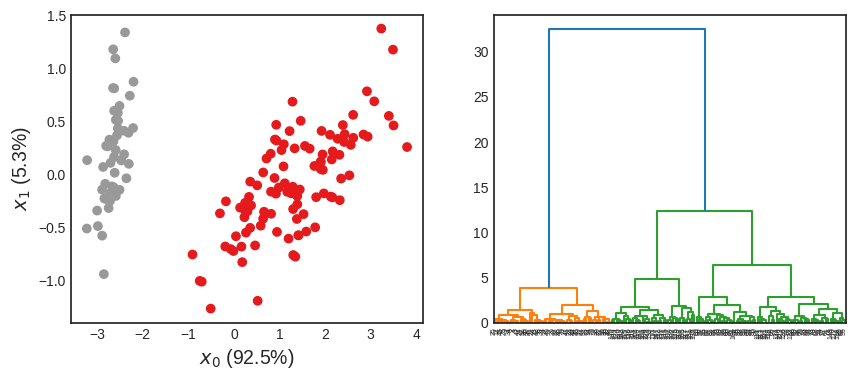

In [18]:
plot_clustering(X_train, 2, "ward", X_transformed)

## Combining unsupervised techniques

Often you will find that a number of unsupervised techniques are combined when exploratory analyses are conducted. This is typically the case when your number of variables is high, where you might suffer from the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). In these cases, the approaches laid out above can be combined using the following scheme, which can be tweaked in function of your research question:  

1) Compute the principal components using PCA; 

2) Select a reduced number of components in function of the explained variance; 

3) Search for a number of $k$ meaningful clusters; 

4) Cluster your data using these final settings; 

We will use this approach and analyze a more challenging dataset, called the [`digits`-dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html). This dataset consists of handwritten images of the numbers 0-9, which has been proprocessed into feature vectors of length 64. 

<div class="alert alert-success">
<b>EXERCISE 4:
<br> 
Apply the approach illustrated above to the `digits` dataset.
<br>
a) Compute the PCA and create a plot of the explained variance.
<br>
b) Perform k-means clustering based on different numbers of principal components. Specifically, use a number of PCs that correspond to explaining 20% to 90% of the variance in steps of 10%. (A helper function is provided.) Create one large plot where the different clustering results are shown as subplots. Make sure to label the subplots.
<br>
c) For the clustering based on 30% of the variance, create a plot where the color represents the clustering and the marker indicates the original label (i.e., the actual number). (You can use the Seaborn library if you prefer!) If this is too easy, try making the markers the actual numbers they represent.

</div>


In [19]:
digits = load_digits()
X = scale(digits.data)
y = digits.target

In [20]:
def return_noc_pca(var, threshold):
    return np.where(np.cumsum(var)>threshold)[0][0]

In [28]:
##3a):
pca = PCA() 
pca.fit(X)
X_transformed = pca.transform(X)
var = pca.explained_variance_ratio_
print(var)

[1.20339161e-01 9.56105440e-02 8.44441489e-02 6.49840791e-02
 4.86015488e-02 4.21411987e-02 3.94208280e-02 3.38938092e-02
 2.99822101e-02 2.93200255e-02 2.78180546e-02 2.57705509e-02
 2.27530332e-02 2.22717974e-02 2.16522943e-02 1.91416661e-02
 1.77554709e-02 1.63806927e-02 1.59646017e-02 1.48919119e-02
 1.34796957e-02 1.27193137e-02 1.16583735e-02 1.05764660e-02
 9.75315947e-03 9.44558990e-03 8.63013827e-03 8.36642854e-03
 7.97693248e-03 7.46471371e-03 7.25582151e-03 6.91911245e-03
 6.53908536e-03 6.40792574e-03 5.91384112e-03 5.71162405e-03
 5.23636803e-03 4.81807586e-03 4.53719260e-03 4.23162753e-03
 4.06053070e-03 3.97084808e-03 3.56493303e-03 3.40787181e-03
 3.27835335e-03 3.11032007e-03 2.88575294e-03 2.76489264e-03
 2.59174941e-03 2.34483006e-03 2.18256858e-03 2.03597635e-03
 1.95512426e-03 1.83318499e-03 1.67946387e-03 1.61236062e-03
 1.47762694e-03 1.35118411e-03 1.25100742e-03 1.03695730e-03
 8.25350945e-04 3.23475858e-33 6.39352227e-34 6.29595280e-34]


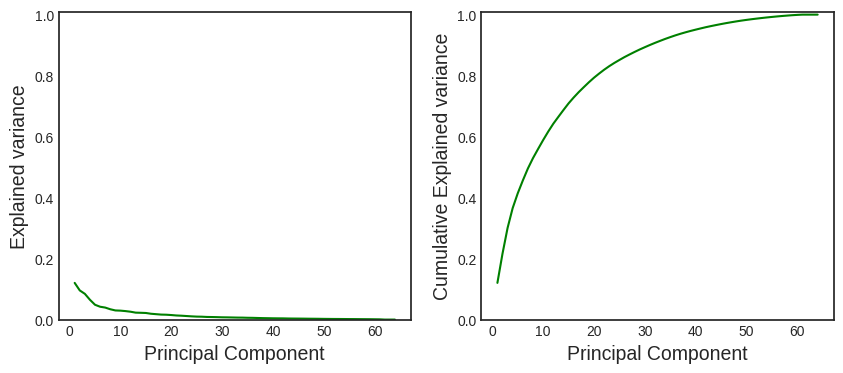

In [29]:
##1b): 
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(np.arange(1,var.shape[0]+1),var,color='g');
ax[0].set_xlabel('Principal Component', size=14)
ax[0].set_ylabel('Explained variance', size=14)
ax[0].set_ylim(0,1.01)

ax[1].plot(np.arange(1,var.shape[0]+1),var.cumsum(),color='g');
ax[1].set_xlabel('Principal Component', size=14)
ax[1].set_ylabel('Cumulative Explained variance', size=14)
ax[1].set_ylim(0,1.01)

plt.show()

/home/natan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/natan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/natan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/natan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

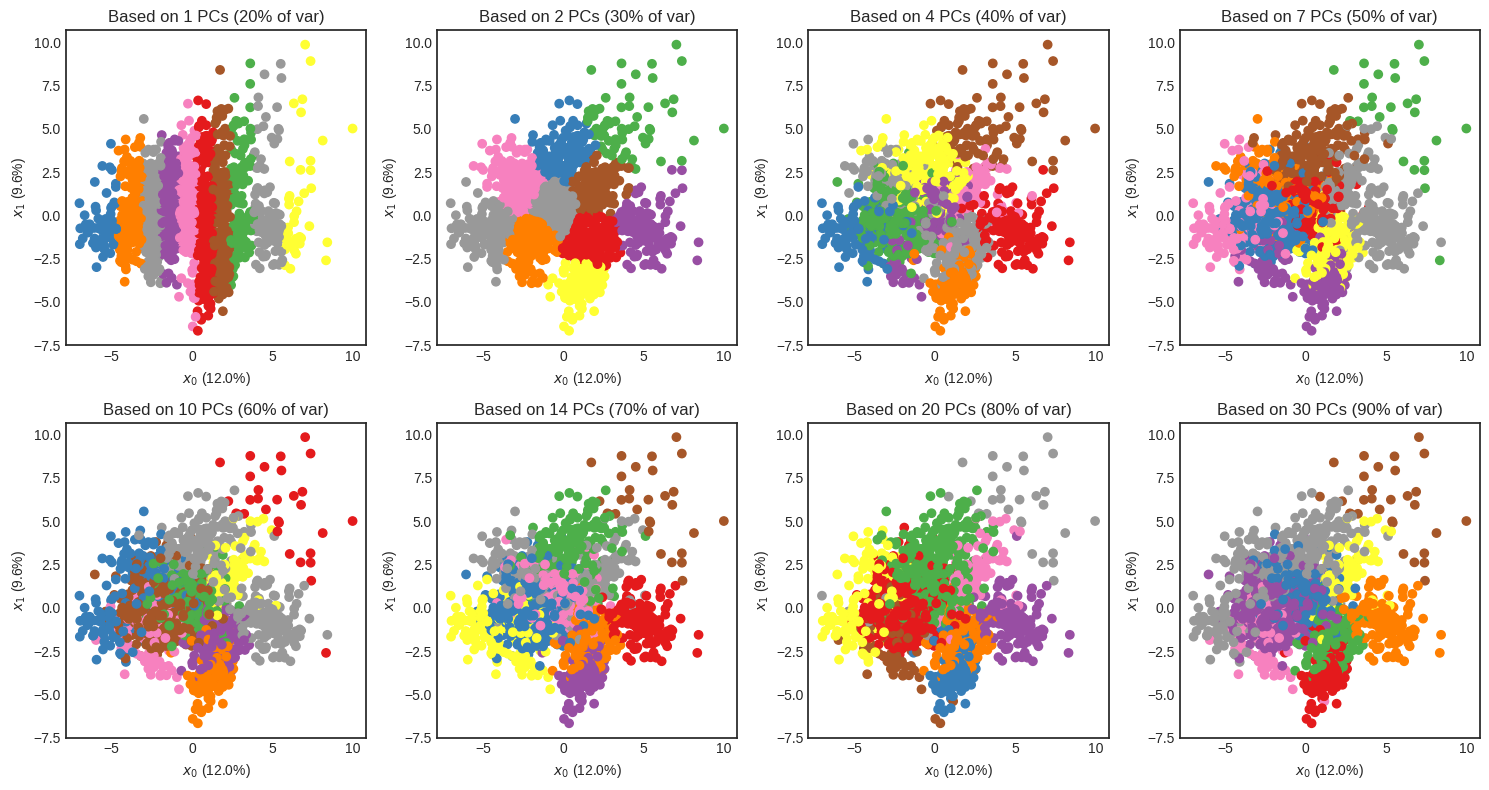

In [52]:
fig, ax = plt.subplots(2,4, figsize=(15,8))
ax = ax.flatten()
for i,temp_var in enumerate(np.arange(0.2,1,0.1)):
    noc = return_noc_pca(var,temp_var)
    kmeans = KMeans(n_clusters=10)
    kmeans.fit(X_transformed[:,0:noc])
    ax[i].scatter(X_transformed[:,0],X_transformed[:,1], c=kmeans.labels_, cmap=plt.cm.Set1);
    ax[i].set_xlabel(r'$x_0$ (' + str(np.round(var[0],3)*100) + '%)')
    ax[i].set_ylabel(r'$x_1$ (' + str(np.round(var[1],3)*100) + '%)')
    ax[i].title.set_text("Based on "+str(noc)+" PCs (" + str(round(temp_var*100)) + "% of var)")

plt.tight_layout()

/home/natan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='pc0', ylabel='pc1'>

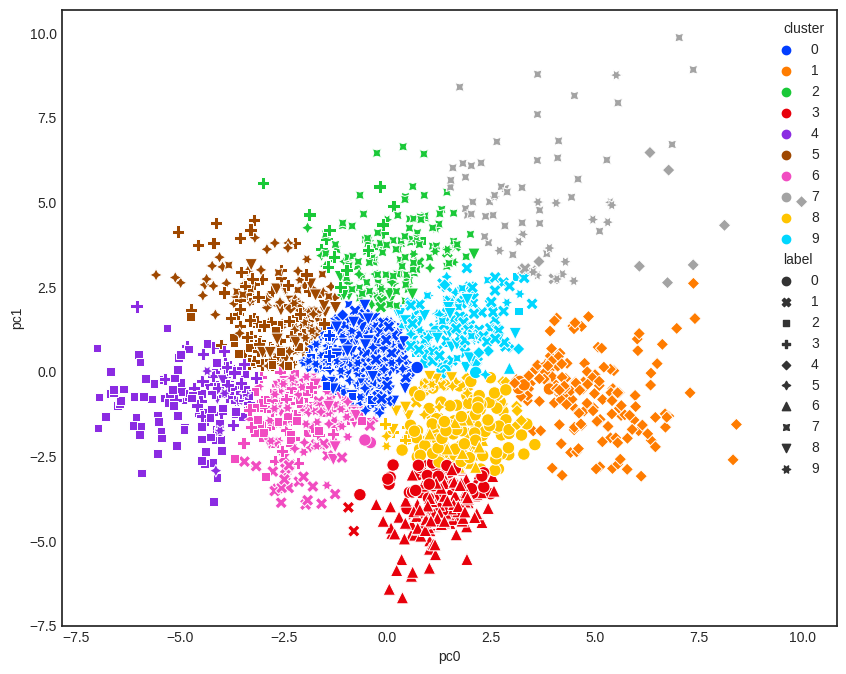

In [82]:
import seaborn as sns
noc = return_noc_pca(var,0.3)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_transformed[:,0:noc])

data = pd.DataFrame({
    "pc0": X_transformed[:,0],
    "pc1": X_transformed[:,1],
    "cluster": kmeans.labels_,
    "label": y
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=data,
    x='pc0', 
    y='pc1',
    hue="cluster",
    style="label",
    s=80,
    palette="bright"
)


/home/natan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


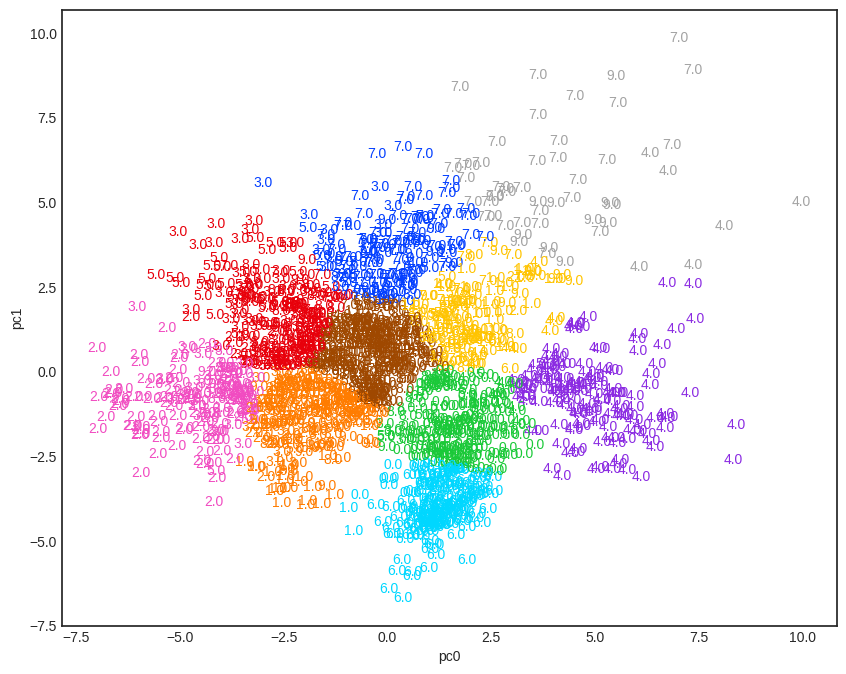

In [83]:
import seaborn as sns
noc = return_noc_pca(var,0.3)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_transformed[:,0:noc])

data = pd.DataFrame({
    "pc0": X_transformed[:,0],
    "pc1": X_transformed[:,1],
    "cluster": kmeans.labels_,
    "label": y
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=data,
    x='pc0', 
    y='pc1',
    s=0
)
unique_colors = dict(zip(data['label'].unique(), sns.color_palette("bright")))
for i, row in data.iterrows():
    plt.text(row['pc0'], row['pc1'], str(row['label']), 
             color=unique_colors[row["cluster"]], ha='center', va='center')

# Remove the color legend if not needed
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[len(set(data['label'])):], labels[len(set(data['label'])):])
